# Treemap
This tree map gives us a comparable and scaled-view of the average graduation rate for each continent. Europe has the largest graduation ratio and Africa has the smallest graduation ratio.

### SetUp

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [2]:
# helper function
def assign_continent(country_code):
    """given a 3 letter country code,
    return the continent the country belongs to"""
    try:
        row = country_to_continent[country_to_continent.Three_Letter_Country_Code == country_code]
        continent = row.Continent_Name.values[0]
        return continent
    except:
        return None

### Pre-Processing
1. Filter Columns
2. Rename Columns
3. Assign each continennt to each country
4. Filter out the non-country level rows

In [3]:
# read in data
grad = pd.read_csv('../data/graduation_ratio_under_secondary_edu.csv')
country_to_continent = pd.read_csv('../data/country_continent.csv')

# 1. filter columns
country_to_continent = country_to_continent[['Three_Letter_Country_Code', 'Continent_Name', 'Country_Name']]
grad = grad[['Indicator', 'LOCATION', 'Country', 'Time', 'Value']]
grad = grad[grad.Time != 2018]

# 2. rename column
grad = grad.replace('Gross graduation ratio from lower secondary education, female (%)', 
                           'Girls')
grad = grad.replace('Gross graduation ratio from lower secondary education, male (%)', 
                           'Boys')

# 3. Assign each country their continent
grad['Continent'] = grad.LOCATION.apply(lambda x: assign_continent(x))

# 4. keep only country level rows
countries = country_to_continent.Three_Letter_Country_Code.unique()
grad_by_country = grad[grad.LOCATION.isin(countries)]

# grad_by_country.head()

### Calculations

In [4]:
# average graduation ratio by continent
grad_ratio_by_country = grad_by_country[['Continent', 'Value']].groupby('Continent').mean().reset_index()

grad_ratio_by_country

,Continent,Value
0,Africa,45.548283
1,Asia,80.980666
2,Europe,100.105891
3,North America,77.832374
4,Oceania,82.917498
5,South America,80.240870


### Plot

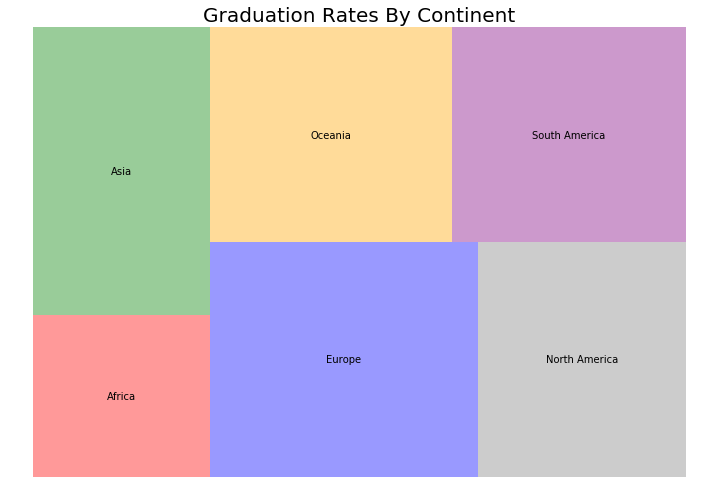

In [5]:
squarify.plot(sizes=grad_ratio_by_country.Value.values, 
              label=grad_ratio_by_country.Continent.values, 
              color=["red","green","blue", "grey", "orange", "purple"], alpha=.4 )

# size 
plt.gcf().set_size_inches(11.7, 8.27)

# title
plt.title(f'Graduation Rates By Continent',fontsize=20)

#axis
plt.axis('off')

# plt.show()
plt.savefig('Treemap')